In [53]:
import numpy as np
import pandas as pd
from groq import Groq
import os
import time

In [54]:
response = pd.read_excel('../../dataframes/llama3-70B-OMIEC190824_0.3_temp_RESPONSES.xlsx')
raw_data =  pd.read_excel('../../data/raw/OMIEC_19_08_24.xlsx')

In [55]:
from IPython.display import display, Markdown

display(Markdown(raw_data['Abstract'][98]))

Diluting organic semiconductors with a host insulating polymer is used to increase the electronic mobility in organic electronic devices, such as thin film transistors, while considerably reducing material costs. In contrast to organic electronics, bioelectronic devices such as the organic electrochemical transistor (OECT) rely on both electronic and ionic mobility for efficient operation, making it challenging to integrate hydrophobic polymers as the predominant blend component. This work shows that diluting the n-type conjugated polymer p(N-T) with high molecular weight polystyrene (10 KDa) leads to OECTs with over three times better mobility-volumetric capacitance product (mu C*) with respect to the pristine p(N-T) (from 4.3 to 13.4 F V-1 cm-1 s-1) while drastically decreasing the amount of conjugated polymer (six times less). This improvement in mu C* is due to a dramatic increase in electronic mobility by two orders of magnitude, from 0.059 to 1.3 cm2 V-1 s-1 for p(N-T):Polystyrene 10 KDa 1:6. Moreover, devices made with this polymer blend show better stability, retaining 77% of the initial drain current after 60 minutes operation in contrast to 12% for pristine p(N-T). These results open a new generation of low-cost organic mixed ionic-electronic conductors where the bulk of the film is made by a commodity polymer. Insulating commodity polymers are mixed with an n-type conjugated polymer to increase the performance of organic electrochemical transistors. Blending the conjugated polymer p(N-T) with large amounts of 10 kDa polystyrene (1:6 in monomer weight) led to an increase in electronic mobility by two orders of magnitude and device stability by 65% with respect to the pristine conjugated polymer. image

In [56]:
result = pd.concat([response, raw_data], axis=1)
result.drop('index', axis=1, inplace=True)

In [57]:
def prepare_corpus(df):
    corpus = []
    for index, row in df.iterrows():
        for token in set(str(row['response']).replace('\n', ';').split(';')):
            corpus.append(token.strip().replace('/', "-").replace(":", "-"))
            
    return pd.Series(corpus)

In [58]:
corpus = prepare_corpus(result)
corpus = corpus[corpus != 'nan']
corpus = corpus[corpus != '']
corpus = corpus.reset_index(drop=True)

In [59]:
len(corpus)

716

In [60]:
len(np.unique(corpus))

274

In [61]:
np.unique(corpus[corpus.str.contains(r'PEDOT', regex=True)].values.tolist())

array(['EG-GOPS-PEDOT-PSS', 'Mel-PEDOT-PSS', 'PEDOT', 'PEDOT- PSS',
       'PEDOT-Dexamethasone phosphate', 'PEDOT-Dextran sulfate',
       'PEDOT-E', 'PEDOT-Hyaluronate', 'PEDOT-LIG', 'PEDOT-N3',
       'PEDOT-Nafion', 'PEDOT-PAH', 'PEDOT-PBA', 'PEDOT-PC', 'PEDOT-PF6',
       'PEDOT-PSS', 'PEDOT-PSS-PVS', 'PEDOT-Phos',
       'PEDOT-PolyDADMA CF3SO3', 'PEDOT-PolyDADMA Cl',
       'PEDOT-PolyDADMA FSI', 'PEDOT-PolyDADMA TFSI',
       'PEDOT-PolyDADMA Tos', 'PEDOT-TOS', 'PEDOT-Tos', 'PEDOT-b-PEG',
       'PEDOT-polyamine', 'PEDOT-tauroursodeoxycholic acid', 'PEDOTS',
       'PEO-PEDOT', 'crys-PEDOT-PSS'], dtype='<U31')

In [62]:
"""replacements = {
    r'.*\s\(([^)]+)\)$': r'\1', # para polímeros que estão no formato 'nome_polímero (abreviação_polímero)', substitui pela abreviação apenas
    r'[Pp]oly\(3,4-ethylenedioxythiophene\)': 'PEDOT',
    r'\b[Pp]EDOT[-\s]?[Pp]oly\(?[0-9]*[-\s]*styrenesulfonate\)?\b': 'PEDOT-PSS',
    r'\b[Pp]EDOT\s*[-\s]*PSS\)?': 'PEDOT-PSS',
    r'\bPEDOT-PSS\)$': 'PEDOT-PSS',
    r'[Pp]olypyrrole': 'PPy',
    r'[Pp]olyethylenedioxythiophene': 'PEDOT',
    r'[Pp]olythiophene[s]?': 'PT',  
    r'[Pp]oly\((thiophene)\)': 'PT',
    r'[Pp]oly\(3-methylthiophene\)': 'P3MT',
    r'[Pp]oly\(3-hexylthiophene\)': 'P3HT',
    r'[Pp]oly\(3-hexylthiophene[-\d,]*diyl\)': 'P3HT'

}"""

replacements = {
    r"(?i)PEDOT-TOS": 'PEDOT-TOS',
     r"(?i)PEDOT-\s*PSS": 'PEDOT-PSS'
}

items_to_remove = [r'(?i)\bmixed\b',
                   r'(?i)\bnone\b',
                   r'MIEC.*',
                   'based', 
                   r'[Pp]olymer',
                   r'OECT.*',
                   'conjug'
                   ]


In [63]:
for pattern, replacement in replacements.items():
    corpus = corpus.str.replace(pattern, replacement, regex=True, case=False)
    
for item in items_to_remove:
    corpus = corpus[~corpus.str.contains(item, regex=True)]

In [64]:
len(corpus)

695

In [65]:
len(corpus.unique())

261

In [66]:
corpus.value_counts().head(50)

PEDOT-PSS        286
PEDOT             40
P3HT              28
BBL               12
Nafion            10
PEO               10
PPy                9
PANI               6
p(g2T-TT)          5
P3MEEMT            5
p(g2T-T)           4
P3MEEET            4
PEDOT-TOS          3
Pg2T-T             3
PEDOT-Nafion       3
CPE-K              2
DPPT-TT            2
P3T                2
f-BTI2g-TVT        2
P3HHT              2
MEH-PPV            2
P3MEET             2
pgBTTT             2
PSS                2
PDDA               2
PBTTT              2
PEDOT-PAH          2
PProDOT            2
PI                 2
LSCF6428           2
TPU                2
P-3O               2
EDOT               2
PPP                2
Homo-gDPP          2
t-gdiPDI           2
PPY                1
gDPP-TTT           1
gDPP-TTVTT         1
PIDTC16-BT         1
PIDTPEG-BT         1
P(gPzDPP-CT2)      1
DPP                1
DPP-g2T            1
PVP                1
PProDOT-DPP        1
PgNaN              1
PgNgN        

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_26804\2760201650.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")


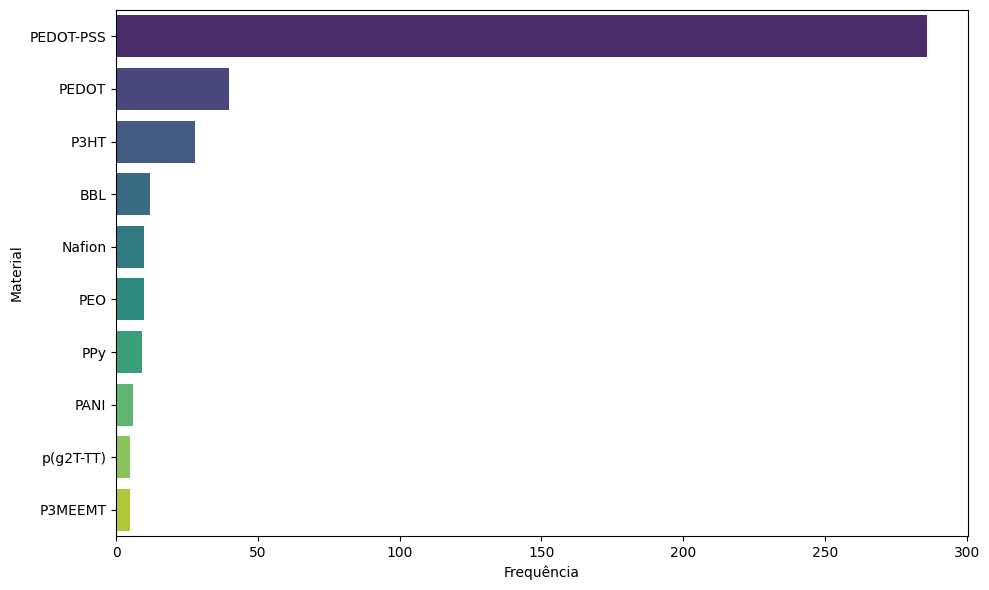

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10_counts = corpus.value_counts().head(10)

# Ajustando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando o histograma
sns.barplot(x=top_10_counts.values, y=top_10_counts.index, palette="viridis")
plt.xlabel('Frequência')
plt.ylabel('Material')

# Ajustando layout para não cortar legendas
plt.tight_layout()

# Salvando a imagem
#plt.savefig('gráficos/llama3-70B-OMIEC160824_RESPONSES_ranking.png')

# Exibindo a imagem
plt.show()


Tendência de publicações sobre a temática durante os anos

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_26804\3736620246.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


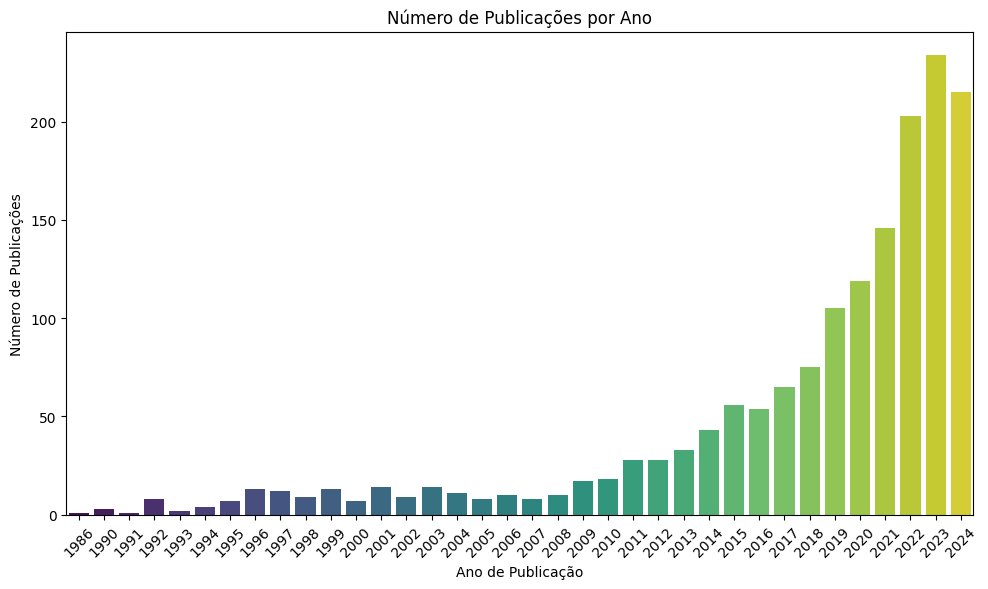

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Seaborn usando a paleta "viridis"
plt.figure(figsize=(10, 6))
sns.barplot(
    x=publication_counts.index, 
    y=publication_counts.values, 
    palette="viridis"  # Aplica a paleta de cores "viridis"
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Publicações por Ano')
plt.xlabel('Ano de Publicação')
plt.ylabel('Número de Publicações')

# Mostrar o gráfico
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Ajustando layout para não cortar legendas
plt.tight_layout()

# Salvando a imagem
plt.savefig('gráficos/llama3-70B-OMIEC160824_publicação_por_ano.png')

plt.show()


Localizando os artigos em que aparecem os polímeros

In [71]:
result

,response,Publication Type,Authors,Book Authors,Book Editors,Book Group Authors,Author Full Names,Book Author Full Names,Group Authors,Article Title,...,Web of Science Index,Research Areas,IDS Number,Pubmed Id,Open Access Designations,Highly Cited Status,Hot Paper Status,Date of Export,UT (Unique WOS ID),Web of Science Record
0,NaN,J,"Kim, Y; Kim, G; Ding, BW; Jeong, D; Lee, I; Pa...",NaN,NaN,NaN,"Kim, Youngseok; Kim, Gunwoo; Ding, Bowen; Jeon...",NaN,NaN,High-Current-Density Organic Electrochemical D...,...,NaN,Chemistry; Science & Technology - Other Topics...,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:000740653700001,0
1,NaN,J,[Anonymous],NaN,NaN,NaN,[Anonymous],NaN,NaN,Organic mixed ionic-electronic conductors prog...,...,NaN,Chemistry; Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:001250931500013,0
2,NaN,J,"Wu, RH; Meli, D; Strzalka, J; Narayanan, S; Zh...",NaN,NaN,NaN,"Wu, Ruiheng; Meli, Dilara; Strzalka, Joseph; N...",NaN,NaN,Bridging length scales in organic mixed ionic-...,...,NaN,Chemistry; Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:001173377100001,0
3,NaN,J,"Shahi, M; Le, VN; Espejo, PA; Alsufyani, M; Ko...",NaN,NaN,NaN,"Shahi, Maryam; Le, Vianna N.; Espejo, Paula Al...",NaN,NaN,The organic electrochemical transistor conundr...,...,NaN,Chemistry; Materials Science; Physics,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:001086729600001,0
4,NaN,J,"Dai, HJ; Yue, W",NaN,NaN,NaN,"Dai, Haojie; Yue, Wan",NaN,NaN,n-Type Organic Mixed Ionic-Electronic Conducto...,...,NaN,Materials Science,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:001193211400001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,NaN,J,"Celander, M; Hahn, ME; Stegeman, JJ",NaN,NaN,NaN,"Celander, M; Hahn, ME; Stegeman, JJ",NaN,NaN,Cytochromes P450 (CYP) in the Poeciliopsis luc...,...,NaN,Biochemistry & Molecular Biology; Biophysics,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:A1996UG91700015,0
1599,NaN,J,"Johnson, WK; Stoupis, C; Torres, GM; Rosenberg...",NaN,NaN,NaN,"Johnson, WK; Stoupis, C; Torres, GM; Rosenberg...",NaN,NaN,Superparamagnetic iron oxide (SPIO) as an oral...,...,NaN,"Radiology, Nuclear Medicine & Medical Imaging",NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:A1996TW43000005,0
1600,Omiecinski,J,"FRIEDBERG, T; GRASSOW, MA; OESCH, F",NaN,NaN,NaN,"FRIEDBERG, T; GRASSOW, MA; OESCH, F",NaN,NaN,SELECTIVE DETECTION OF MESSENGER-RNA FORMS ENC...,...,NaN,Biochemistry & Molecular Biology; Biophysics,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:A1990DD24100024,0
1601,NaN,J,"SCHUETZ, EG; SCHUETZ, JD; MAY, B; GUZELIAN, PS",NaN,NaN,NaN,"SCHUETZ, EG; SCHUETZ, JD; MAY, B; GUZELIAN, PS",NaN,NaN,REGULATION OF CYTOCHROME-P-450B/E AND P-450P G...,...,NaN,Biochemistry & Molecular Biology,NaN,NaN,NaN,NaN,NaN,2024-08-19,WOS:A1990CH53300085,0


In [69]:
polímeros_encontrados = pd.DataFrame(columns=['Nome'] + result.columns.tolist())

for index, row in result.iterrows():
    for token in set(str(row['response']).replace('\n', ';').split(';')):
            polimero = token.strip().replace('/', "-").replace(":", "-")
            new_row = row.to_dict() 
            new_row['Nome'] = polimero
            new_row_df = pd.DataFrame([new_row])
            polímeros_encontrados = pd.concat([new_row_df, polímeros_encontrados], ignore_index=True)

C:\Users\thaynara220042\AppData\Local\Temp\ipykernel_26804\4170896890.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  polímeros_encontrados = pd.concat([new_row_df, polímeros_encontrados], ignore_index=True)


In [73]:
for pattern, replacement in replacements.items():
    polímeros_encontrados['Nome'] = polímeros_encontrados['Nome'].str.replace(pattern, replacement, regex=True, case=False)

In [87]:
for index, row in polímeros_encontrados[polímeros_encontrados['Nome'] == 'PEO'].iterrows():
    print(row['Nome'],"| Citações:", row['Times Cited, All Databases'] , '\n', row['Abstract'], '\n')

PEO | Citações: 48 
 A series of semiconducting small molecules with bithiophene or bis-3,4-ethylenedioxythiophene cores are designed and synthesized. The molecules display stable reversible oxidation in solution and can be reversibly oxidized in the solid state with aqueous electrolyte when functionalized with polar triethylene glycol side chains. Evidence of promising ion injection properties observed with cyclic voltammetry is complemented by strong electrochromism probed by spectroelectrochemistry. Blending these molecules with high molecular weight polyethylene oxide (PEO) is found to improve both ion injection and thin film stability. The molecules and their corresponding PEO blends are investigated as active layers in organic electrochemical transistors (OECTs). For the most promising molecule:polymer blend (P4E4:PEO), p-type accumulation mode OECTs with mu A drain currents, mu S peak transconductances, and a mu C* figure-of-merit value of 0.81 F V-1 cm(-1) s(-1) are obtained. 


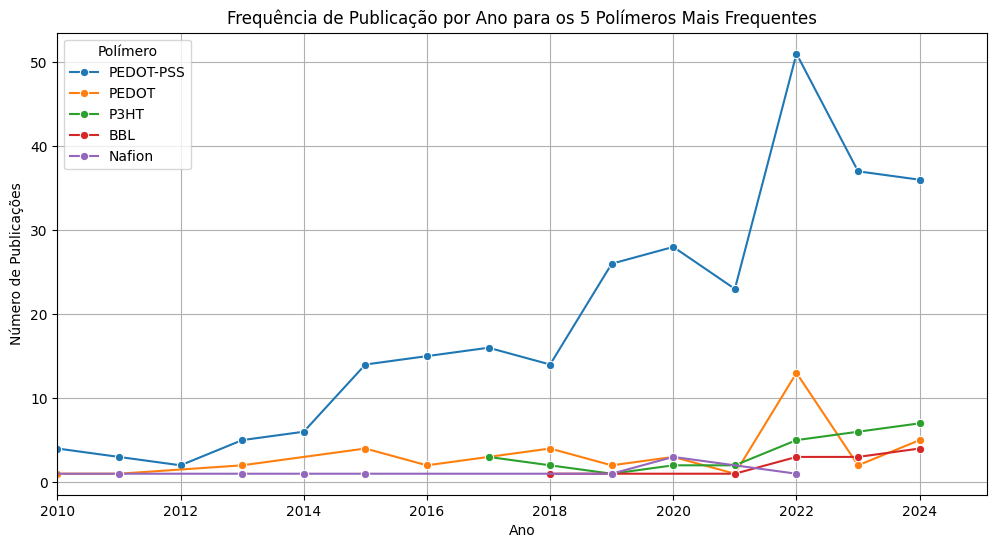

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dfs = []


for polymer in corpus.value_counts().head(5).index:
    publication_counts = polímeros_encontrados[polímeros_encontrados['Nome'] == polymer]['Publication Year'].value_counts()
    publication_counts = publication_counts.sort_index().reset_index()
    publication_counts.columns = ['Year', 'Count']
    publication_counts['Polymer'] = polymer
    dfs.append(publication_counts)


combined_df = pd.concat(dfs)

plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x='Year', y='Count', hue='Polymer', marker='o')
plt.title('Frequência de Publicação por Ano para os 5 Polímeros Mais Frequentes')
plt.xlabel('Ano')
plt.ylabel('Número de Publicações')
plt.legend(title='Polímero')
plt.grid(True)

plt.xlim(left=2010)

plt.savefig('gráficos/llama3-70B-OMIEC190824_freq_publicação_polimero.png')

plt.show()


### Playground

In [86]:
for index, row in result.iterrows():    
    if not isinstance(row['response'], float) and  'PEDOT' in row['Nome']:
        print(row['response'], '\n', row['Abstract'], '\n' )

KeyError: 'Nome'

Tendência de publicações por ano plotado com plotly

In [17]:
import plotly.express as px

# Supondo que 'raw_data' seja o seu DataFrame e 'Publication Year' seja a coluna com os anos de publicação
publication_counts = raw_data['Publication Year'].value_counts()

# Ordenar os valores pela data para melhorar a visualização (opcional)
publication_counts = publication_counts.sort_index()

# Criar o gráfico de barras com Plotly
fig = px.bar(
    x=publication_counts.index, 
    y=publication_counts.values, 
    labels={'x': 'Publication Year', 'y': 'Number of Publications'},
    title='Number of Publications per Year',
    color=publication_counts.index,  # Adiciona cor baseado no índice (ano de publicação)
    color_continuous_scale='viridis'  # Aplica a paleta "viridis"
)

# Configurar o layout
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotaciona os rótulos do eixo x para melhor visualização
    yaxis_title='Number of Publications',
    xaxis_title='Publication Year',
    coloraxis_showscale=False  # Oculta a barra de escala de cores, se indesejado
)

# Mostrar o gráfico
fig.show()
